In [3]:
from bil.m import rigS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
from pathlib import Path
from scipy.optimize import curve_fit
from scipy import stats

# zstd

In [7]:
runID_list = ['U201128_01','U201129_01','U201130_01','U201201_01','U201202_01',
              'U201203_01','U201204_01','U201205_01','U201206_01','U201207_01',
              'U201208_01','U201209_01','U201210_01']
all_data=[np.load(runID+"compression_rate_zstd.npy") for runID in runID_list]

day = []
for i in range(3,13):
    day=np.concatenate((day,[i+1]*len(all_data[i])),axis=0)
    
cr_pre = np.concatenate((all_data[0],all_data[1],all_data[2]),axis=0)
cr_post = np.concatenate((all_data[3],all_data[4],all_data[5],all_data[6],all_data[7],all_data[8],all_data[9],all_data[10],all_data[11],all_data[12]),axis=0)
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, cr_post)
xdata=np.array([4,5,6,7,8,9,10,11,12,13],dtype=np.float64)

In [10]:
stats.levene(cr_pre, cr_post)

LeveneResult(statistic=436.38922256860485, pvalue=7.415271864283004e-96)

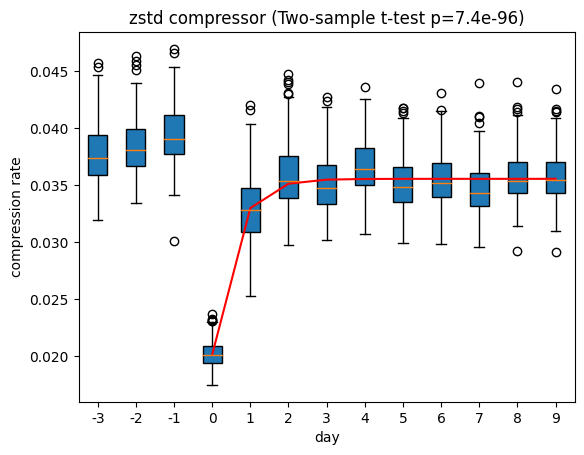

In [11]:
figure,axes=plt.subplots()
axes.boxplot(all_data,patch_artist=True);
plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13],
         xticklabels=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9]);
axes.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt));
plt.title("zstd compressor (Two-sample t-test p=7.4e-96)");
plt.xlabel("day");
plt.ylabel("compression rate");

# gzip

In [12]:
all_data=[np.load(runID+"compression_rate_gzip.npy") for runID in runID_list]

day = []
for i in range(3,13):
    day=np.concatenate((day,[i+1]*len(all_data[i])),axis=0)
    
cr_pre = np.concatenate((all_data[0],all_data[1],all_data[2]),axis=0)
cr_post = np.concatenate((all_data[3],all_data[4],all_data[5],all_data[6],all_data[7],all_data[8],all_data[9],all_data[10],all_data[11],all_data[12]),axis=0)
    
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(func, day, cr_post)
xdata=np.array([4,5,6,7,8,9,10,11,12,13],dtype=np.float64)

In [13]:
stats.levene(cr_pre, cr_post)

LeveneResult(statistic=460.4698310430528, pvalue=5.5887432074083624e-101)

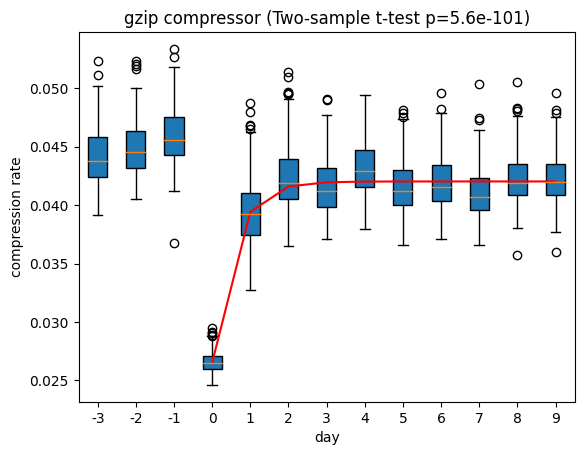

In [14]:
figure,axes=plt.subplots()
axes.boxplot(all_data,patch_artist=True);
plt.setp(axes, xticks=[1,2,3,4,5,6,7,8,9,10,11,12,13],
         xticklabels=[-3,-2,-1,0,1,2,3,4,5,6,7,8,9]);
axes.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt));
plt.title("gzip compressor (Two-sample t-test p=5.6e-101)");
plt.xlabel("day");
plt.ylabel("compression rate");